In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.shape

(200, 5)

In [6]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


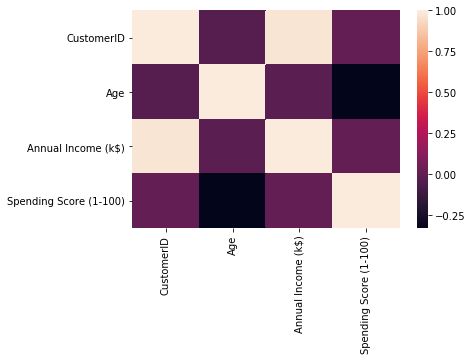

In [7]:
sns.heatmap(df.corr())

In [11]:
df.drop(['CustomerID','Age','Genre'],axis=1,inplace=True)

In [12]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


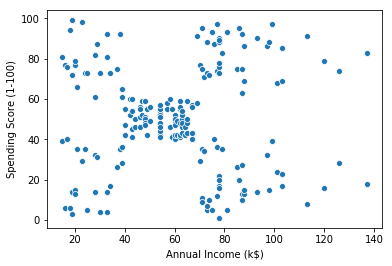

In [15]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

In [17]:
from sklearn.cluster import KMeans

In [18]:
km=KMeans(n_clusters=200)

In [19]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=200, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
km.inertia_

0.0

In [22]:
km.cluster_centers_

array([[103.,  23.],
       [ 50.,  49.],
       [ 98.,  88.],
       [ 30.,  73.],
       [ 28.,  14.],
       [ 75.,   5.],
       [ 71.,  75.],
       [ 78.,  22.],
       [ 65.,  43.],
       [126.,  74.],
       [ 15.,  39.],
       [ 15.,  81.],
       [ 67.,  57.],
       [137.,  18.],
       [ 88.,  86.],
       [ 29.,  87.],
       [ 78.,  88.],
       [ 40.,  42.],
       [ 88.,  69.],
       [ 23.,  29.],
       [ 47.,  59.],
       [ 19.,   3.],
       [ 19.,  99.],
       [ 88.,  15.],
       [113.,   8.],
       [ 71.,  35.],
       [ 60.,  52.],
       [ 38.,  35.],
       [ 71.,  95.],
       [101.,  68.],
       [113.,  91.],
       [ 30.,   4.],
       [137.,  83.],
       [120.,  16.],
       [ 97.,  32.],
       [ 46.,  51.],
       [ 60.,  42.],
       [ 24.,  73.],
       [ 28.,  61.],
       [ 54.,  54.],
       [ 87.,  27.],
       [ 20.,  15.],
       [ 74.,  72.],
       [126.,  28.],
       [ 38.,  92.],
       [ 39.,  65.],
       [ 54.,  44.],
       [ 61.,

In [31]:
km=KMeans(n_clusters=1)     # clustering with 1 centroid

In [24]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
km.inertia_

269981.28

In [26]:
km.cluster_centers_

array([[60.56, 50.2 ]])

In [27]:
km=KMeans(n_clusters=2)   #clustering with 2 centroid

In [28]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
km.inertia_          

181363.59595959596

In [30]:
km.cluster_centers_           # centroid poiny

array([[79.6       , 50.12727273],
       [37.28888889, 50.28888889]])

In [35]:
wcss=[]
for i in range(1,30):
    km=KMeans(n_clusters=i)
    km.fit(df)
    wcss.append(km.inertia_)
    

In [36]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37442.24745037571,
 30241.34361793659,
 25022.485004530354,
 21850.165282585633,
 19664.685196005543,
 17879.739741460093,
 15983.542925048807,
 14514.313494504662,
 13180.48268308134,
 11983.008927347162,
 10924.33048530417,
 10220.35600379153,
 9357.692901131264,
 8950.425238891545,
 8298.44950629081,
 7820.867269331976,
 7226.00404270652,
 6787.096702317291,
 6447.577541065073,
 6124.249248790426,
 5646.13942530899,
 5432.193815363381,
 5121.32149647738,
 4968.241666666667]

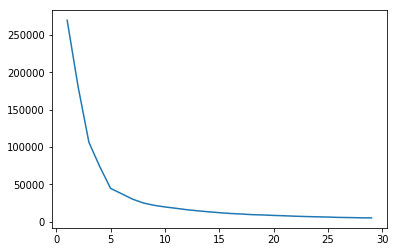

In [37]:
plt.plot(range(1,30),wcss)

In [41]:

km=KMeans(n_clusters=5)
clusters=km.fit_predict(df)

In [42]:
df['cluster']=clusters

In [43]:
df

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
5,17,76,2
6,18,6,4
7,18,94,2
8,19,3,4
9,19,72,2


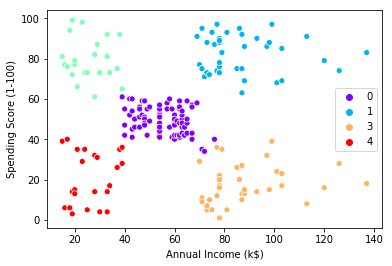

In [47]:
sns.scatterplot(x='Annual Income (k$)', y= 'Spending Score (1-100)', data=df, hue=clusters, palette='rainbow')

In [48]:
dmap={0: 'low AI,high SS', 1:'high AI,low SS',2:'high AI, high SS',3:'low AI, low SS',4:'medium AI, medium SS'}

In [49]:
df['cluster']=df['cluster'].map(dmap)

In [50]:
df.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,"medium AI, medium SS"
1,15,81,"high AI, high SS"
2,16,6,"medium AI, medium SS"
3,16,77,"high AI, high SS"
4,17,40,"medium AI, medium SS"
